# Testing Best Correlated Observables

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

from dwrangling import pickle_object, unpickle_object
from dwrangling.dataframes import ODataFrame
from dwrangling.dataframes.observables import add_reconstructed_observables
from dwrangling.pipelines import get_dataframe
from trees.classifiers import BinaryTreeClassifier
from analysis.metrics import confusion_matrix, find_p_threshold, S_B_ratio
from analysis.plotting.clout import plot_results, ROC_curve
from analysis.pipeline import show_tree_paths

In [2]:
coll = "pp_2mu2e"
df = ODataFrame(add_reconstructed_observables(get_dataframe(coll)))

In [3]:
all_observables = ['Z_e_m', 'Z_mu_m', 'delR_e', 'delR_mu', 'm_H', 'delR_Z', 'Z_mu_px', 'Z_e_px','Z_e_pz', 'Z_mu_pz']
df = ODataFrame(df[all_observables+['signal',]])

In [4]:
display(df.get_s().describe())
display(df.get_b().describe())

,Z_e_m,Z_mu_m,delR_e,delR_mu,m_H,delR_Z,Z_mu_px,Z_e_px,Z_e_pz,Z_mu_pz,signal
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,63.393028,63.903923,39.634366,40.167338,205.556620,4.814478,0.125394,-0.125394,0.498042,-0.847531,1.0
std,29.761405,29.878580,36.569585,35.794229,193.397481,2.723547,72.905372,72.905372,181.900418,177.944872,0.0
min,5.575905,5.289038,0.842999,0.406965,119.696479,3.141593,-606.357959,-470.788668,-1728.260415,-2186.831206,1.0
25%,31.796571,31.900597,14.230242,14.907946,124.997949,3.151792,-12.770848,-12.702129,-54.896660,-58.775255,1.0
50%,76.959595,78.947862,28.194944,29.272644,125.001560,3.194587,-0.207126,0.207126,0.765848,0.637884,1.0
75%,90.785560,90.764812,56.548832,57.836959,125.035394,9.424794,12.702129,12.770848,56.719402,58.117758,1.0
max,226.548509,294.329929,491.697955,452.236751,2238.931138,10.181016,470.788668,606.357959,1491.313603,1675.673941,1.0


,Z_e_m,Z_mu_m,delR_e,delR_mu,m_H,delR_Z,Z_mu_px,Z_e_px,Z_e_pz,Z_mu_pz,signal
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,81.838932,82.346013,50.006086,50.597466,245.167454,4.928826,-1.064605,1.064605,2.000751,0.366273,0.0
std,32.200322,34.907912,35.274053,37.815076,119.924413,2.721464,52.694099,52.694099,197.655361,200.682159,0.0
min,4.286511,4.456713,0.581534,0.632857,60.006996,3.141593,-388.468999,-378.903353,-1403.126962,-1999.800357,0.0
25%,87.307370,87.256733,20.412580,19.906503,190.055545,3.175390,-25.254822,-24.639057,-88.761635,-89.183096,0.0
50%,90.820124,90.826127,45.614991,46.025743,224.692705,3.307384,-0.104928,0.104928,2.101125,0.769665,0.0
75%,92.193330,92.171650,74.423181,75.140556,283.351810,9.424939,24.639057,25.254822,92.830002,90.148656,0.0
max,1027.489924,936.666520,436.942149,660.834604,1499.360097,10.155831,378.903353,388.468999,1849.599984,1513.221235,0.0


In [5]:
cols = df.columns

In [6]:
from itertools import chain, combinations
def powerset(iterable):
    s = list(iterable)  # allows duplicate elements
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [7]:
len(best_obs)

NameError: name 'best_obs' is not defined

In [274]:
counter = 0
combs = powerset(cols[:-1])
next(combs)
comb_res = []
len_combs = 1023
for i, combo in enumerate(best_obs, 1):
    print(f"Set: {i}/{len(best_obs)} {combo}")
    
    sbs = []
    for train, test in ODataFrame( df[list(combo)+['signal']] ).cross_validation_sets(k=5):
        tree = BinaryTreeClassifier(max_depth=10, min_samples_split=350, min_samples_leaf=50)
        tree.fit(*train.ML_input())
        
        obsv, labs = test.ML_input()
        labs_pred = tree.predict(obsv)
        
        
        p_cut = find_p_threshold(labs, labs_pred)
        sb = S_B_ratio(labs, labs_pred, p_cut)
        sbs.append(sb)
    
    sbs = np.array(sbs)
    comb_res.append( (sbs.mean(), sbs.std()) )

print("FINISHED")

Set: 1/144 ('Z_mu_m', 'm_H')
Set: 2/144 ('Z_e_m', 'delR_e', 'm_H')
Set: 3/144 ('Z_e_m', 'm_H', 'Z_mu_px')
Set: 4/144 ('Z_e_m', 'm_H', 'Z_e_px')
Set: 5/144 ('Z_mu_m', 'delR_e', 'm_H')
Set: 6/144 ('Z_mu_m', 'delR_mu', 'm_H')
Set: 7/144 ('Z_mu_m', 'm_H', 'delR_Z')
Set: 8/144 ('Z_mu_m', 'm_H', 'Z_e_pz')
Set: 9/144 ('Z_mu_m', 'm_H', 'Z_mu_pz')
Set: 10/144 ('Z_e_m', 'delR_e', 'delR_mu', 'm_H')
Set: 11/144 ('Z_e_m', 'delR_e', 'm_H', 'delR_Z')
Set: 12/144 ('Z_e_m', 'delR_e', 'm_H', 'Z_mu_px')
Set: 13/144 ('Z_e_m', 'delR_e', 'm_H', 'Z_e_px')
Set: 14/144 ('Z_e_m', 'delR_e', 'm_H', 'Z_e_pz')
Set: 15/144 ('Z_e_m', 'delR_e', 'm_H', 'Z_mu_pz')
Set: 16/144 ('Z_e_m', 'delR_mu', 'm_H', 'Z_mu_px')
Set: 17/144 ('Z_e_m', 'delR_mu', 'm_H', 'Z_e_px')
Set: 18/144 ('Z_e_m', 'm_H', 'delR_Z', 'Z_mu_px')
Set: 19/144 ('Z_e_m', 'm_H', 'delR_Z', 'Z_e_px')
Set: 20/144 ('Z_e_m', 'm_H', 'Z_mu_px', 'Z_e_px')
Set: 21/144 ('Z_e_m', 'm_H', 'Z_mu_px', 'Z_e_pz')
Set: 22/144 ('Z_e_m', 'm_H', 'Z_mu_px', 'Z_mu_pz')
Set: 23/144

Set: 132/144 ('Z_e_m', 'delR_mu', 'm_H', 'delR_Z', 'Z_mu_px', 'Z_e_pz', 'Z_mu_pz')
Set: 133/144 ('Z_e_m', 'delR_mu', 'm_H', 'delR_Z', 'Z_e_px', 'Z_e_pz', 'Z_mu_pz')
Set: 134/144 ('Z_e_m', 'delR_mu', 'm_H', 'Z_mu_px', 'Z_e_px', 'Z_e_pz', 'Z_mu_pz')
Set: 135/144 ('Z_e_m', 'm_H', 'delR_Z', 'Z_mu_px', 'Z_e_px', 'Z_e_pz', 'Z_mu_pz')
Set: 136/144 ('Z_mu_m', 'delR_e', 'delR_mu', 'm_H', 'delR_Z', 'Z_e_pz', 'Z_mu_pz')
Set: 137/144 ('Z_e_m', 'delR_e', 'delR_mu', 'm_H', 'delR_Z', 'Z_mu_px', 'Z_e_px', 'Z_e_pz')
Set: 138/144 ('Z_e_m', 'delR_e', 'delR_mu', 'm_H', 'delR_Z', 'Z_mu_px', 'Z_e_px', 'Z_mu_pz')
Set: 139/144 ('Z_e_m', 'delR_e', 'delR_mu', 'm_H', 'delR_Z', 'Z_mu_px', 'Z_e_pz', 'Z_mu_pz')
Set: 140/144 ('Z_e_m', 'delR_e', 'delR_mu', 'm_H', 'delR_Z', 'Z_e_px', 'Z_e_pz', 'Z_mu_pz')
Set: 141/144 ('Z_e_m', 'delR_e', 'delR_mu', 'm_H', 'Z_mu_px', 'Z_e_px', 'Z_e_pz', 'Z_mu_pz')
Set: 142/144 ('Z_e_m', 'delR_e', 'm_H', 'delR_Z', 'Z_mu_px', 'Z_e_px', 'Z_e_pz', 'Z_mu_pz')
Set: 143/144 ('Z_e_m', 'delR_mu'

In [11]:
ordered = sorted([(n, *res) for n, res in enumerate(comb_res)], key=lambda row: row[1], reverse=True)
for n, sb, std in ordered:
    print(f"#{n} : {sb-std:.4f} - {sb+std:.4f} -> {best_obs[n]}")

NameError: name 'comb_res' is not defined

#pickle_object(comb_res, "best_observ_comb_results.pkl")

In [8]:
all_snr_results = unpickle_object("best_observ_comb_results.pkl")

In [9]:
d = [(n, res) for n, res in enumerate(all_snr_results)]

In [10]:
d = sorted(d, key=lambda k: k[-1][0], reverse=True)

In [12]:
ordered = sorted([(n, *res) for n, res in enumerate(all_snr_results)], key=lambda row: row[1], reverse=True)
# for n, sb, std in ordered:
#     print(f"#{n} : {sb-std:.4f} - {sb+std:.4f} -> {best_obs[n]}")

In [13]:
sn_scores = sorted(set(res[1] for res in ordered), reverse=True)
sn_max = sn_scores[1]
sn_max, len(sn_scores)

(3.740795556485908, 383)

In [14]:
maxs = [res for res in d if (res[1][0] >= sn_max)]
max_indexs = [res[0] for res in maxs]

In [15]:
combs = powerset(cols[:-1])
next(combs)
best_obs = []
for i, combo in enumerate(combs):
    if i in max_indexs:
        print(combo)
        best_obs.append(combo)

('Z_mu_m', 'm_H')
('Z_e_m', 'delR_e', 'm_H')
('Z_e_m', 'm_H', 'Z_mu_px')
('Z_e_m', 'm_H', 'Z_e_px')
('Z_mu_m', 'delR_e', 'm_H')
('Z_mu_m', 'delR_mu', 'm_H')
('Z_mu_m', 'm_H', 'delR_Z')
('Z_mu_m', 'm_H', 'Z_e_pz')
('Z_mu_m', 'm_H', 'Z_mu_pz')
('Z_e_m', 'delR_e', 'delR_mu', 'm_H')
('Z_e_m', 'delR_e', 'm_H', 'delR_Z')
('Z_e_m', 'delR_e', 'm_H', 'Z_mu_px')
('Z_e_m', 'delR_e', 'm_H', 'Z_e_px')
('Z_e_m', 'delR_e', 'm_H', 'Z_e_pz')
('Z_e_m', 'delR_e', 'm_H', 'Z_mu_pz')
('Z_e_m', 'delR_mu', 'm_H', 'Z_mu_px')
('Z_e_m', 'delR_mu', 'm_H', 'Z_e_px')
('Z_e_m', 'm_H', 'delR_Z', 'Z_mu_px')
('Z_e_m', 'm_H', 'delR_Z', 'Z_e_px')
('Z_e_m', 'm_H', 'Z_mu_px', 'Z_e_px')
('Z_e_m', 'm_H', 'Z_mu_px', 'Z_e_pz')
('Z_e_m', 'm_H', 'Z_mu_px', 'Z_mu_pz')
('Z_e_m', 'm_H', 'Z_e_px', 'Z_e_pz')
('Z_e_m', 'm_H', 'Z_e_px', 'Z_mu_pz')
('Z_mu_m', 'delR_e', 'delR_mu', 'm_H')
('Z_mu_m', 'delR_e', 'm_H', 'delR_Z')
('Z_mu_m', 'delR_e', 'm_H', 'Z_e_pz')
('Z_mu_m', 'delR_e', 'm_H', 'Z_mu_pz')
('Z_mu_m', 'delR_mu', 'm_H', 'delR_Z'

In [16]:
obs = list(set(obs for res in best_obs
 for obs in res))

In [17]:
obs_scores = {key:0 for key in obs}
for res in best_obs:
    for obs in res:
        obs_scores[obs] += 1
obs_scores.keys()

dict_keys(['delR_e', 'Z_e_pz', 'Z_mu_pz', 'Z_e_px', 'delR_mu', 'Z_e_m', 'Z_mu_m', 'delR_Z', 'Z_mu_px', 'm_H'])

<module 'analysis.plotting' from 'C:\\Users\\Student\\Documents\\University\\Physics\\Year 4\\Dissertation\\Code\\analysis\\plotting\\__init__.py'>

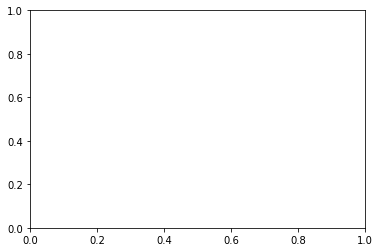

In [18]:
from importlib import reload
import analysis.plotting
reload(analysis.plotting)

In [19]:
from analysis.plotting import latex_label, std_cmap

In [20]:
from collections import OrderedDict
from matplotlib.patches import Rectangle


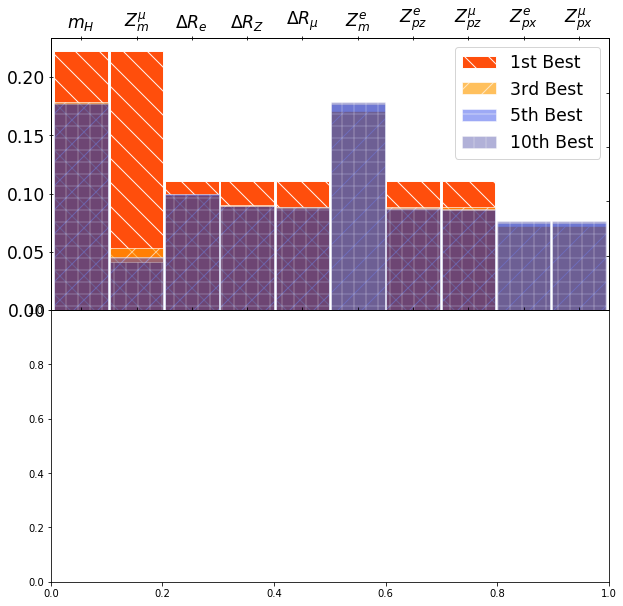

In [25]:
asdfas = ['m_H', 'Z_mu_m', 'delR_e', 'delR_Z', 'delR_mu', 'Z_e_m', 'Z_e_pz', 'Z_mu_pz', 'Z_e_px', 'Z_mu_px']
strs = {1:'st', 2:'nd', 3:'rd'}
alphas = {0:0.95, 2:0.63, 4:0.46, 9:0.3}
hatches = {0:'\\', 2:'/', 4:'-', 9:'|'}



weights = {0:10, 2:7, 4:5, 9:1}



cs = {n:c for n,c in zip([0,2,4,9], std_cmap.reversed()(np.linspace(0,1,4)))}

fig, axes = plt.subplots(figsize=(10,10), nrows=2, ncols=1,
                         gridspec_kw={'wspace':0, 'hspace':0})
ax = axes[0]
ax.patch.set_alpha(0.0)

holds = {key:0 for key in asdfas}
tot, tot_weight = 0, 0
obs_scores = OrderedDict((key,0) for key in asdfas)
wobs_scores = OrderedDict((key,0) for key in asdfas)
for n in range(10):
    
    sn_max = sn_scores[n]
    maxs = [res for res in d if (res[-1][0] >= sn_max)]
    max_indexs = [res[0] for res in maxs]
    
    combs = powerset(cols[:-1])
    next(combs)
    best_obs = []
    for i, combo in enumerate(combs):
        if i in max_indexs:
            best_obs.append(combo)
   
    for res in best_obs:
        for obs in res:
            a = 1.3779 if obs is 'Z_e_m' else 1
            obs_scores[obs] += a
            tot += a
            
    
    if n in [0, 2, 4, 9]:
        D = obs_scores.copy()
        for obs in D:
            D[obs] /= tot
            wobs_scores[obs] += D[obs] * weights[n]
        
        nstr = strs.get(n+1, 'th')
        ax.bar(range(len(D)), list(D.values()), align='center', alpha=alphas[n], label=str(n+1)+nstr+" Best", zorder=n, facecolor=cs[n], width=0.97, hatch=hatches[n], edgecolor='white')

# Draw figures so ticks and labels can be obtained
fig.canvas.draw()
        
ax.set_xticks(range(len(D)))
ax.set_xticklabels(latex_label(list(D.keys())))
ax.set_xlim(ax.get_xticks()[0]-0.55, ax.get_xticks()[-1]+0.54)
    

ax_R = ax.twinx()
ax_R.set_ylim(ax.get_ylim())
ax_R.set_yticks(ax.get_yticks())
ax_R.tick_params(axis='y', which='major', direction='in', left=False, right=True,
                 labelleft=False, labelright=False)
ax_R.set_axisbelow(False)

ax_B = ax.twiny()
ax_B.set_xlim(ax.get_xlim())
ax_B.set_xticks(ax.get_xticks())
ax_B.tick_params(axis='x', which='major', direction='in', top=False, bottom=True,
                 labeltop=False, labelbottom=False)
ax_B.set_axisbelow(False)


ax.tick_params(axis='both', which='major', direction='inout', labelsize='xx-large',
               top=True, bottom=False, labeltop=True, labelbottom=False,
               left=True, right=False, labelleft=True, labelright=False)
ax.set_axisbelow(False)

ax.legend(prop={'size': 'xx-large'})

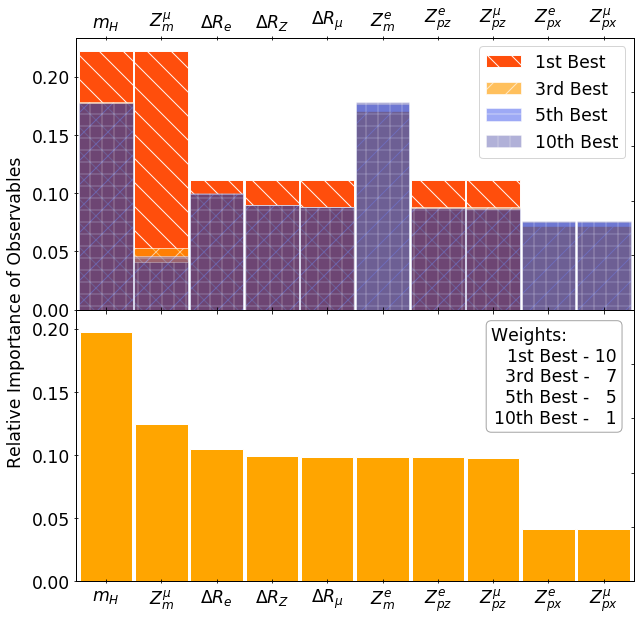

['m_H', 'Z_mu_m', 'delR_e', 'delR_Z', 'delR_mu', 'Z_e_m', 'Z_e_pz', 'Z_mu_pz', 'Z_e_px', 'Z_mu_px']


In [26]:
ax = axes[1]
ax.patch.set_alpha(0.0)

D = wobs_scores.copy()
tot_weight = sum(v for v in D.values())
for obs in D:
    D[obs] /= tot_weight

D = OrderedDict(sorted(D.items(), key=lambda kv: kv[1], reverse=True))
ax.bar(range(len(D)), list(D.values()), align='center', alpha=1.0, zorder=0, facecolor='orange', width=0.95, hatch='', edgecolor='white')

# Draw figures so ticks and labels can be obtained
fig.canvas.draw()

ax.set_ylim(axes[0].get_ylim())
ax.set_yticks(axes[0].get_yticks())
ax.set_yticklabels(axes[0].get_yticklabels())

ax.set_xlim(axes[0].get_xlim())
ax.set_xticks(range(len(D)))
ax.set_xticklabels(axes[0].get_xticklabels())


ax_R = ax.twinx()
ax_R.set_ylim(ax.get_ylim())
ax_R.set_yticks(ax.get_yticks())
ax_R.tick_params(axis='y', which='major', direction='in', left=False, right=True,
                 labelleft=False, labelright=False)
ax_R.set_axisbelow(False)

ax_T = ax.twiny()
ax_T.set_xlim(ax.get_xlim())
ax_T.set_xticks(ax.get_xticks())
ax_T.tick_params(axis='x', which='major', direction='in', top=True, bottom=False,
                 labeltop=False, labelbottom=False)
ax_T.set_axisbelow(False)


ax.tick_params(axis='both', which='major', direction='inout', labelsize='xx-large',
               top=False, bottom=True, labeltop=False, labelbottom=True,
               left=True, right=False, labelleft=True, labelright=False)
ax.set_axisbelow(False)
ax.set_ylim((0,0.215))

# Creat weights to put into legend
weight_str = '\n'.join([r'Weights:         ', r'1st Best - 10', r'3rd Best -   7', r'5th Best -   5', r'10th Best -   1'])
ax.annotate(weight_str, xy=(0.97, 0.94), xycoords='axes fraction',
            fontsize='xx-large', ha='right', va='top',
            bbox=dict(boxstyle='round', fc='white', ec='grey', alpha=0.7))


fig.text(0.03, 0.5, "Relative Importance of Observables",
         va='center', rotation='vertical', fontsize='xx-large')

display(fig)

print("['"+"', '".join(list(D.keys()))+"']")

In [27]:
fig.savefig('fig/Observable Histograms.png', transparent=True)

In [92]:
sn_scores

[3.803313190396081,
 3.740795556485908,
 3.718301465671944,
 3.7167132745090004,
 3.710349747756561,
 3.699360672827724,
 3.697694758078788,
 3.681138146457528,
 3.6774054074378255,
 3.6595284422688414,
 3.6546156637625393,
 3.638027817234638,
 3.6331241519127295,
 3.6303979149180194,
 3.6156976297936883,
 3.608157573235033,
 3.5976106259133522,
 3.579428794783768,
 3.5740526750089376,
 3.5737659598923073,
 3.572913486796335,
 3.563186774287479,
 3.561135915486697,
 3.554615977040688,
 3.5507635488886233,
 3.545179879616883,
 3.53052919699884,
 3.5220909052249936,
 3.4976621323498898,
 3.496831824792441,
 3.4733875344331984,
 3.396053995139077,
 3.346034768969209,
 3.3290107782192986,
 3.260073620535065,
 3.2333789591661,
 3.229006177159926,
 3.2287160789839473,
 3.2269126753448787,
 3.2266225771689,
 3.2131457424152736,
 3.2128556442392955,
 3.2100536481184307,
 3.2097635499424526,
 3.20663043442784,
 3.2063403362518614,
 3.1755114430582174,
 3.0951996316831227,
 3.093321417235669,
 2

In [77]:
combs = powerset(cols[:-1])
next(combs)
sn_obs = []
for res, combo in zip(indsss, combs):
    sn_obs.append((*res[-1], combo))

In [81]:
sn_obs = sorted(sn_obs, key=lambda res: res[0], reverse=True)

In [82]:
sn_obs

[(3.803313190396081, 0.05763704323280738, ('Z_mu_m', 'm_H')),
 (3.803313190396081, 0.05763704323280738, ('Z_mu_m', 'delR_e', 'm_H')),
 (3.803313190396081, 0.05763704323280738, ('Z_mu_m', 'delR_mu', 'm_H')),
 (3.803313190396081, 0.05763704323280738, ('Z_mu_m', 'm_H', 'delR_Z')),
 (3.803313190396081, 0.05763704323280738, ('Z_mu_m', 'm_H', 'Z_e_pz')),
 (3.803313190396081, 0.05763704323280738, ('Z_mu_m', 'm_H', 'Z_mu_pz')),
 (3.803313190396081,
  0.05763704323280738,
  ('Z_mu_m', 'delR_e', 'delR_mu', 'm_H')),
 (3.803313190396081,
  0.05763704323280738,
  ('Z_mu_m', 'delR_e', 'm_H', 'delR_Z')),
 (3.803313190396081,
  0.05763704323280738,
  ('Z_mu_m', 'delR_e', 'm_H', 'Z_e_pz')),
 (3.803313190396081,
  0.05763704323280738,
  ('Z_mu_m', 'delR_e', 'm_H', 'Z_mu_pz')),
 (3.803313190396081,
  0.05763704323280738,
  ('Z_mu_m', 'delR_mu', 'm_H', 'delR_Z')),
 (3.803313190396081,
  0.05763704323280738,
  ('Z_mu_m', 'delR_mu', 'm_H', 'Z_e_pz')),
 (3.803313190396081,
  0.05763704323280738,
  ('Z_mu_m',

In [85]:
obs_indexes = {key:n for n,key in enumerate(all_observables)}

In [106]:
sn_index = 0

score_obs_dict = {}
empty = np.array([0,0,0,0,0,0,0,0,0,0])
for sn, stdev, obs in sn_obs:
    
    score = sn_scores[sn_index]
    if score > sn:
        sn_index += 1
        score = sn_scores[sn_index]
    assert score == sn
    
    table = np.array([0,0,0,0,0,0,0,0,0,0])
    for ob in obs:
        table[ obs_indexes[ob] ] += 1
    
    score_obs_dict[score] = table + score_obs_dict.get(score, empty)
    
    

In [107]:
score_obs_dict

{3.803313190396081: array([ 0, 32, 16, 16, 32, 16,  0,  0, 16, 16]),
 3.740795556485908: array([112,   0,  64,  56, 112,  56,  64,  64,  56,  56]),
 3.718301465671944: array([0, 0, 3, 0, 3, 3, 2, 2, 0, 0]),
 3.7167132745090004: array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0]),
 3.710349747756561: array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0]),
 3.699360672827724: array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0]),
 3.697694758078788: array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0]),
 3.681138146457528: array([0, 0, 2, 2, 2, 0, 0, 0, 1, 2]),
 3.6774054074378255: array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1]),
 3.6595284422688414: array([0, 0, 0, 3, 3, 0, 2, 2, 3, 0]),
 3.6546156637625393: array([0, 0, 0, 2, 2, 0, 0, 0, 1, 2]),
 3.638027817234638: array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0]),
 3.6331241519127295: array([0, 0, 3, 3, 3, 0, 2, 2, 3, 0]),
 3.6303979149180194: array([0, 0, 0, 0, 3, 3, 2, 2, 0, 0]),
 3.6156976297936883: array([ 0, 96, 48, 48, 96, 48, 64, 64, 48, 48]),
 3.608157573235033: array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0]),
 3.597610

In [125]:
norm_score_obs_dict = {}
for score, table in score_obs_dict.items():
    norm_score_obs_dict[score] = (table / 1023)* (table / sum(table))
norm_score_obs_dict

{3.803313190396081: array([0.        , 0.00695123, 0.00173781, 0.00173781, 0.00695123,
        0.00173781, 0.        , 0.        , 0.00173781, 0.00173781]),
 3.740795556485908: array([0.01915934, 0.        , 0.00625611, 0.00478983, 0.01915934,
        0.00478983, 0.00625611, 0.00625611, 0.00478983, 0.00478983]),
 3.718301465671944: array([0.        , 0.        , 0.00067674, 0.        , 0.00067674,
        0.00067674, 0.00030077, 0.00030077, 0.        , 0.        ]),
 3.7167132745090004: array([0.        , 0.        , 0.00024438, 0.00024438, 0.00024438,
        0.        , 0.        , 0.        , 0.00024438, 0.        ]),
 3.710349747756561: array([0.        , 0.        , 0.        , 0.00048876, 0.00048876,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 3.699360672827724: array([0.        , 0.        , 0.        , 0.        , 0.00048876,
        0.00048876, 0.        , 0.        , 0.        , 0.        ]),
 3.697694758078788: array([0.        , 0.        , 0.0003

In [126]:
obs_coords = {}
for obs, idx in obs_indexes.items():
    xs, ys = [], []
    for score, table in norm_score_obs_dict.items():
        xs.append(score)
        ys.append(table[idx])
    obs_coords[obs] = np.array(ys)
obs_coords['xs'] = np.array(xs)

In [127]:
obs_coords

{'Z_e_m': array([0.        , 0.01915934, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00391007,
        0.        , 0.01373292, 0.00568737, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00043445, 0.0012031 , 0.00097752, 0.00223432,
        0.00173781, 0.00032584, 0.00142184, 0.00260671, 0.00024438,
        0.00078201, 0.00032584, 0.00024438, 0.00142184, 0.00035546,
        0.00048876, 0.00032584, 0.00065168, 0.00032584, 0.00065168,
        0.0012031 , 0.00043445, 0.00024

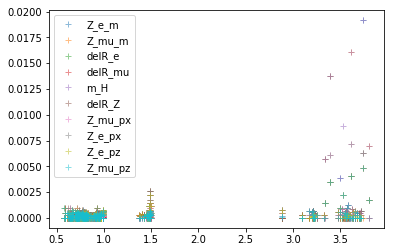

In [134]:
plt.figure()
for obs in obs_indexes:
    plt.plot(obs_coords['xs'], obs_coords[obs], label=obs, alpha=0.5, marker='+', linestyle='None')
plt.legend()
# plt.xlim(3.5, sn_max)
plt.show()